In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [3]:
data = pd.read_csv('creditcard.csv')
data.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

In [6]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

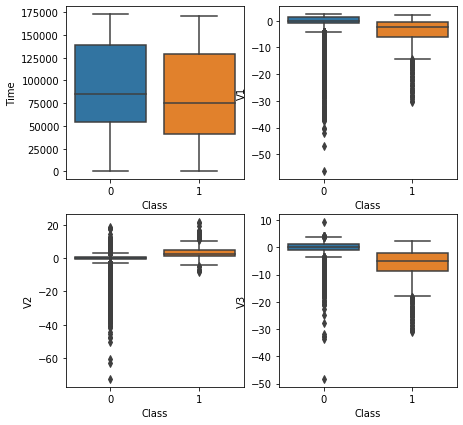

In [7]:
#Checking effect of Independent variables on Dependent variable Class
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.boxplot(x="Class", y="Time", data=data, ax=axes[0, 0])
sns.boxplot(x="Class", y="V1", data=data, ax=axes[0, 1])
sns.boxplot(x="Class", y="V2", data=data, ax=axes[1, 0])
sns.boxplot(x="Class", y="V3", data=data, ax=axes[1, 1])
plt.show()

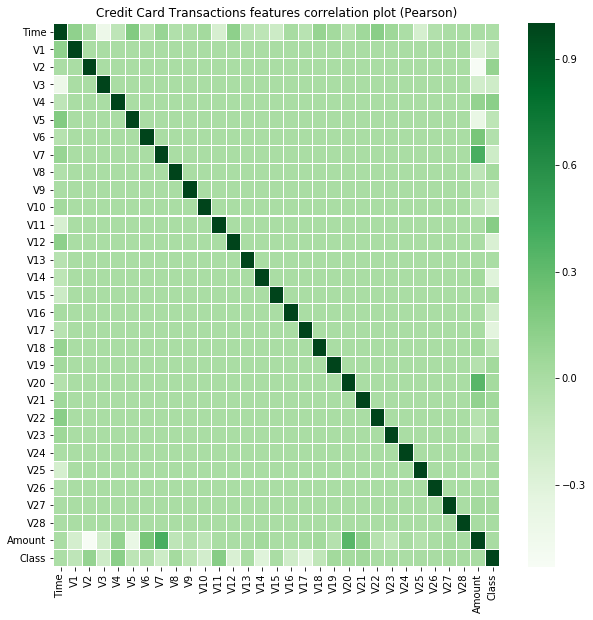

In [8]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

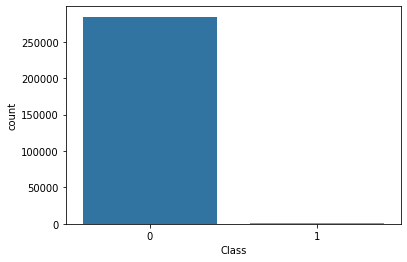

In [9]:
sns.countplot(x='Class', data=data) 

In [11]:
data.isnull().sum() #No Null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#Defining X and Y form
y = data.iloc[:,30]
X = data.iloc[:,0:30]

In [15]:
X.shape, X.columns, y.head()

((284807, 30),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype='object'),
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Class, dtype: int64)

In [17]:
# Now We will scale our data set and transform it altogether by Standard Scaler, Will also check for shape of transformed X
X_trans = ss().fit_transform(X)
X_trans.shape

(284807, 30)

In [20]:
#Now We will split the dataset into train and Test part

X_train, X_test, y_train, y_test =   train_test_split(X_trans,y,test_size = 0.3,stratify = y)
                                

In [21]:
X_train.shape  

(199364, 30)

In [22]:
#Now We will train our Model by using different algorithms

In [23]:
xg = XGBClassifier(learning_rate=0.5,reg_alpha= 5,reg_lambda= 0.1) 

In [24]:
# here we are using SMOTE (Oversampling method) to balance the Classes in depedent variable

In [26]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [29]:
X_res.shape, y_res.shape

((398040, 30), (398040,))

In [30]:
xg_res = xg.fit(X_res, y_res)

In [31]:
#Prediction
y_pred_xg_res = xg_res.predict(X_test)
y_pred_xg_res

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
y_pred_xg_res_prob = xg_res.predict_proba(X_test)
y_pred_xg_res_prob

array([[9.9998987e-01, 1.0159470e-05],
       [9.9882579e-01, 1.1742321e-03],
       [9.9986845e-01, 1.3152287e-04],
       ...,
       [9.9999732e-01, 2.6598470e-06],
       [9.9999988e-01, 1.4308462e-07],
       [9.9999577e-01, 4.2585521e-06]], dtype=float32)

In [33]:
#accuracy score
print ('Accuracy Score',accuracy_score(y_test,y_pred_xg_res))


Accuracy Score 0.9981625177018597


In [34]:
confusion_matrix(y_test,y_pred_xg_res)

array([[85160,   135],
       [   22,   126]])

In [35]:
fpr_xg_res, tpr_xg_res, thresholds = roc_curve(y_test,y_pred_xg_res_prob[: , 1],pos_label= 1)

In [36]:
p_xg_res,r_xg_res,f_xg_res,_ = precision_recall_fscore_support(y_test,y_pred_xg_res)

In [37]:
p_xg_res,r_xg_res,f_xg_res

(array([0.99974173, 0.48275862]),
 array([0.99841726, 0.85135135]),
 array([0.99907905, 0.61613692]))

In [38]:
print ('AUC using XGB and SMOTE',auc(fpr_xg_res,tpr_xg_res))

AUC using XGB and SMOTE 0.9706782343630929


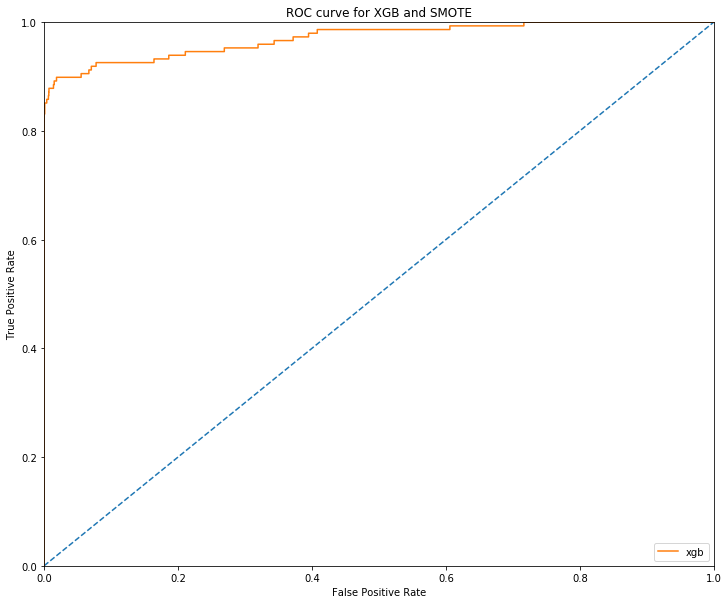

In [39]:
fig = plt.figure(figsize=(12,10)) 
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], ls="--")   
ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for XGB and SMOTE')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.plot(fpr_xg_res, tpr_xg_res, label = "xgb")
ax.legend(loc="lower right")
plt.show()

In [40]:
ad = ADASYN(random_state=42) #Performing Adasyn because it is best way to fix Imbalanced class dataset
X_ada, y_ada = sm.fit_sample(X_train, y_train)

In [41]:
X_ada.shape

(398040, 30)

In [42]:
y_ada.shape

(398040,)

In [43]:
#Now we will again train our model with ada X and Y
xg_ada = xg.fit(X_ada, y_ada)

In [44]:
y_pred_xg_ada = xg_ada.predict(X_test)
y_pred_xg_ada

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
y_pred_xg_ada_prob = xg_ada.predict_proba(X_test)
y_pred_xg_ada_prob

array([[9.9998987e-01, 1.0159470e-05],
       [9.9882579e-01, 1.1742321e-03],
       [9.9986845e-01, 1.3152287e-04],
       ...,
       [9.9999732e-01, 2.6598470e-06],
       [9.9999988e-01, 1.4308462e-07],
       [9.9999577e-01, 4.2585521e-06]], dtype=float32)

In [46]:
print ('Accuracy using XGB and ADASYN',accuracy_score(y_test,y_pred_xg_ada))

Accuracy using XGB and ADASYN 0.9981625177018597


In [47]:
confusion_matrix(y_test,y_pred_xg_ada)

array([[85160,   135],
       [   22,   126]])

In [48]:
fpr_xg_ada, tpr_xg_ada, thresholds = roc_curve(y_test,y_pred_xg_ada_prob[: , 1],pos_label= 1)

In [49]:
p_xg_ada,r_xg_ada,f_xg_ada,_ = precision_recall_fscore_support(y_test,y_pred_xg_ada)

In [50]:
p_xg_ada,r_xg_ada,f_xg_ada

(array([0.99974173, 0.48275862]),
 array([0.99841726, 0.85135135]),
 array([0.99907905, 0.61613692]))

In [51]:
print ('AUC using XGB and ADASYN',auc(fpr_xg_ada,tpr_xg_ada))

AUC using XGB and ADASYN 0.9706782343630929


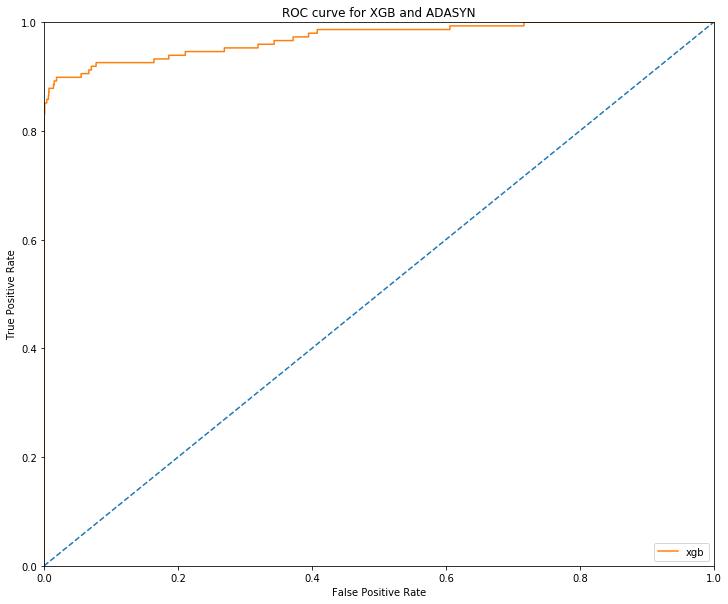

In [52]:
fig = plt.figure(figsize=(12,10))        
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], ls="--")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for XGB and ADASYN')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.plot(fpr_xg_ada, tpr_xg_ada, label = "xgb")
ax.legend(loc="lower right")
plt.show()